In [11]:
import pyodbc

server = r"LAPTOP-RO8RV296\SQLEXPRESS"
database = "SalesDB"

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

try:
    conn = pyodbc.connect(conn_str)
    print("Connected Successfully!")
except Exception as e:
    print("Connection failed:", e)


Connected Successfully!


In [12]:
import pandas as pd

query = "SELECT * FROM MyTable;"
df = pd.read_sql(query, conn)

df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_13316\970220509.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Order_ID,Order_Date,Customer_ID,Region,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount
0,1001,2023-01-21,CUST714,South,Accessories,Wallet,5,3972,19860
1,1002,2023-04-10,CUST971,West,Accessories,Belt,3,3644,10932
2,1003,2023-03-29,CUST591,South,Accessories,Bag,5,969,4845
3,1004,2023-02-27,CUST121,North,Clothing,Jeans,4,1384,5536
4,1005,2023-02-28,CUST610,South,Home Appliances,Mixer,1,674,674


In [13]:
# Fix column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Remove nulls if any
df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          500 non-null    int64         
 1   Order_Date        500 non-null    datetime64[ns]
 2   Customer_ID       500 non-null    object        
 3   Region            500 non-null    object        
 4   Product_Category  500 non-null    object        
 5   Product_Name      500 non-null    object        
 6   Quantity          500 non-null    int64         
 7   Unit_Price        500 non-null    int64         
 8   Total_Amount      500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 35.3+ KB


In [14]:
total_sales = df['Total_Amount'].sum()
avg_order_value = df['Total_Amount'].mean()
total_customers = df['Customer_ID'].nunique()

repeat_customers = df['Customer_ID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].count()

print("Total Sales:", total_sales)
print("Average Order Value:", avg_order_value)
print("Total Customers:", total_customers)
print("Repeat Customers:", repeat_customers)


Total Sales: 3810614
Average Order Value: 7621.228
Total Customers: 385
Repeat Customers: 100


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

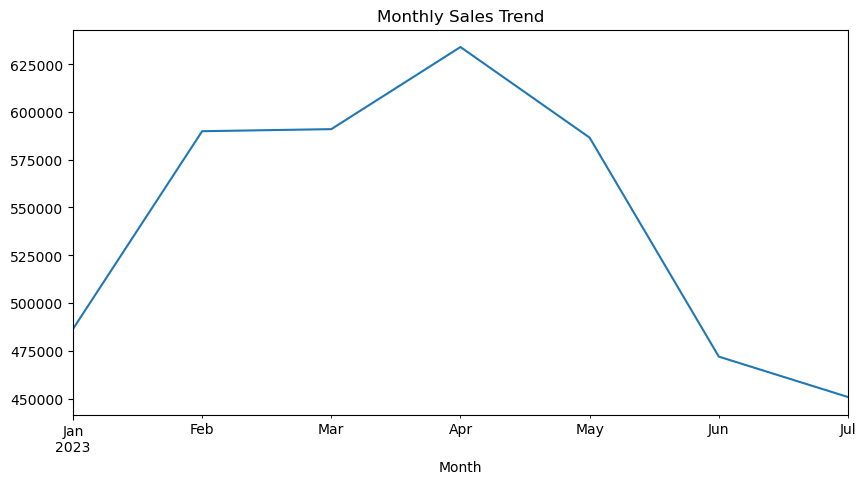

In [15]:
df['Month'] = df['Order_Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total_Amount'].sum()

monthly_sales.plot(figsize=(10,5), title="Monthly Sales Trend")


In [16]:
top_products = df.groupby('Product_Name')['Total_Amount'].sum().sort_values(ascending=False).head(10)
top_products


Product_Name
Wallet        377784
Smartphone    315649
Headphones    295226
Tablet        292323
Jeans         287343
Belt          285791
T-Shirt       260088
Toaster       259879
Microwave     243415
Watch         198068
Name: Total_Amount, dtype: int64

In [17]:
top_products = df.groupby('Product_Name')['Total_Amount'].sum().sort_values(ascending=False).head(10)
top_products


Product_Name
Wallet        377784
Smartphone    315649
Headphones    295226
Tablet        292323
Jeans         287343
Belt          285791
T-Shirt       260088
Toaster       259879
Microwave     243415
Watch         198068
Name: Total_Amount, dtype: int64

In [18]:
region_perf = df.groupby('Region')['Total_Amount'].sum()
region_perf


Region
East      765086
North     964095
South    1131065
West      950368
Name: Total_Amount, dtype: int64

In [19]:
df_product = df.groupby('Product_Name')['Total_Amount'].sum().sort_values(ascending=False)

cum_percent = df_product.cumsum() / df_product.sum() * 100

ABC = pd.cut(
    cum_percent,
    bins=[0, 80, 95, 100],
    labels=['A', 'B', 'C']
)

abc_df = pd.DataFrame({"Sales": df_product, "Class": ABC})
abc_df.head(15)


,Sales,Class
Product_Name,,
Wallet,377784,A
Smartphone,315649,A
Headphones,295226,A
Tablet,292323,A
Jeans,287343,A
Belt,285791,A
T-Shirt,260088,A
Toaster,259879,A
Microwave,243415,A


In [20]:
df = pd.read_sql(query, conn)

C:\Users\USER\AppData\Local\Temp\ipykernel_13316\1168034203.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [21]:
df.head()


,Order_ID,Order_Date,Customer_ID,Region,Product_Category,Product_Name,Quantity,Unit_Price,Total_Amount
0,1001,2023-01-21,CUST714,South,Accessories,Wallet,5,3972,19860
1,1002,2023-04-10,CUST971,West,Accessories,Belt,3,3644,10932
2,1003,2023-03-29,CUST591,South,Accessories,Bag,5,969,4845
3,1004,2023-02-27,CUST121,North,Clothing,Jeans,4,1384,5536
4,1005,2023-02-28,CUST610,South,Home Appliances,Mixer,1,674,674
